<a href="https://colab.research.google.com/github/abhyagarg22/fractal-implementation/blob/main/fractal_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

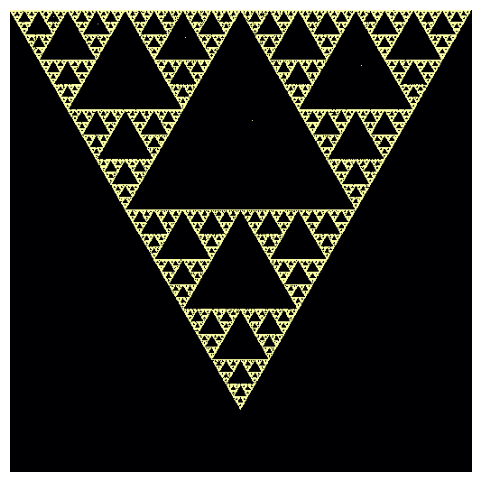

In [3]:
import torch
import matplotlib.pyplot as plt

# Parameters
size = 512  # Image size (size x size)
iterations = 100000  # Number of points to generate

# Define the three corners of the triangle
corners = torch.tensor([[0.0, 0.0],
                        [1.0, 0.0],
                        [0.5, 0.866]])  # height = sqrt(3)/2 for equilateral

# Initialize the first point randomly
point = torch.rand(1, 2)

# Store all points
points = torch.zeros(iterations, 2)

for i in range(iterations):
    # Randomly select one of the three corners
    corner = corners[torch.randint(0, 3, (1,))]
    # Move halfway toward the corner
    point = (point + corner) / 2
    points[i] = point

# Scale points to image size
x = (points[:, 0] * (size - 1)).long()
y = (points[:, 1] * (size - 1)).long()

# Create an empty image
image = torch.zeros(size, size)

# Set the points in the image
image[y, x] = 1.0

# Plot the fractal
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='inferno')
plt.axis('off')
plt.show()
